In [2]:
import pandas as pd
import pandas_datareader as pdr


In [3]:
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 8.1 MB/s eta 0:00:00


In [4]:
import datetime

In [9]:
#Fetching stock data
import yfinance as yf

start_date = "2023-03-01"
end_date = "2024-03-01"

data_nflx = yf.download("NFLX", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [12]:
#Calculating log returns

import numpy as np

NFLX_logret = np.log(data_nflx['Adj Close']).diff()

NFLX_logret

Date
2023-03-01         NaN
2023-03-02   -0.005117
2023-03-03    0.010525
2023-03-06   -0.010045
2023-03-07   -0.011475
                ...   
2024-02-23   -0.008379
2024-02-26    0.006984
2024-02-27    0.023578
2024-02-28   -0.008663
2024-02-29    0.010739
Name: Adj Close, Length: 252, dtype: float64

In [14]:
print(X.head())

            const  Adj Close
Date                        
2023-03-01    1.0        NaN
2023-03-02    1.0  -0.005117
2023-03-03    1.0   0.010525
2023-03-06    1.0  -0.010045
2023-03-07    1.0  -0.011475


In [15]:
print(y.head())

Date
2023-03-01         NaN
2023-03-02   -0.005117
2023-03-03    0.010525
2023-03-06   -0.010045
2023-03-07   -0.011475
Name: Adj Close, dtype: float64


In [16]:
print(NFLX_logret.head())

Date
2023-03-01         NaN
2023-03-02   -0.005117
2023-03-03    0.010525
2023-03-06   -0.010045
2023-03-07   -0.011475
Name: Adj Close, dtype: float64


In [17]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [18]:
#Running regressions

import statsmodels.api as sm

X = sm.add_constant(NFLX_logret)
y = NFLX_logret
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.177e+33
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:13:30   Log-Likelihood:                 9643.0
No. Observations:                 251   AIC:                        -1.928e+04
Df Residuals:                     249   BIC:                        -1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.328e-18   3.19e-19     -4.165      0.0

In [21]:
NFLX_ret = data_nflx['Adj Close'].pct_change()

sd_NFLX = NFLX_ret.std() * np.sqrt(252)

NFLX_ret


Date
2023-03-01         NaN
2023-03-02   -0.005104
2023-03-03    0.010581
2023-03-06   -0.009994
2023-03-07   -0.011409
                ...   
2024-02-23   -0.008344
2024-02-26    0.007009
2024-02-27    0.023858
2024-02-28   -0.008626
2024-02-29    0.010797
Name: Adj Close, Length: 252, dtype: float64

In [22]:
sd_NFLX

0.3700873527854379

In [24]:
import numpy as np
from scipy.stats import norm


In [25]:
! pip install empyrical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39756 sha256=1f7227a5cf2baa1668da74f632675f4ccd99b32ee9c2bea679b04cc758432133
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built empyrical


In [26]:
import empyrical

In [28]:
NFLX_ret = globals()['NFLX_ret']

In [31]:
NFLX_mean = np.mean(NFLX_ret)
NFLX_risk = np.std(NFLX_ret)




In [32]:
print("NFLX_risk:", NFLX_risk)
VaR05_Gaussian = -(NFLX_mean + NFLX_risk * norm.ppf(0.05)) * 10000
print("VaR05_Gaussian:", VaR05_Gaussian)
ES05_Gaussian = 10000 * (NFLX_mean + NFLX_risk * norm.pdf(norm.ppf(0.05)) / 0.05)
print("ES05_Gaussian:", ES05_Gaussian)

NFLX_risk: 0.02326682466863146
VaR05_Gaussian: 353.9789569524332
ES05_Gaussian: 508.6540248261497


In [35]:
returns = data_nflx['Adj Close'].pct_change()

In [37]:
returns = pd.DataFrame(returns)

In [38]:
# Rename the columns to include '_ret' suffix
returns.columns = [col + '_ret' for col in returns.columns]

In [40]:
print("Return.annualized(NFLX):", empyrical.annual_return(returns))
print("maxDrawdown(NFLX):", empyrical.max_drawdown(returns))

Return.annualized(NFLX): Adj Close_ret    0.923312
dtype: float64
maxDrawdown(NFLX): 0   -0.275131
dtype: float64


In [46]:
import empyrical

# Sharpe Ratio (Annualized)
print("Sharpe Ratio (Annualized) - NFLX:", empyrical.sharpe_ratio(returns, period='daily'))

# Value at Risk (VaR)
print("VaR (0.05) - NFLX:", empyrical.value_at_risk(returns, cutoff=0.05))





Sharpe Ratio (Annualized) - NFLX: [1.95602891]
VaR (0.05) - NFLX: nan


In [52]:
import empyrical



In [53]:
import numpy as np

def kelly_criterion(returns):
    mu = np.mean(returns)
    sigma = np.std(returns)
    return mu / sigma**2

In [55]:
# Calculate Kelly Criterion for each stock
print("Kelly Criterion - NFLX:", kelly_criterion(returns))

Kelly Criterion - NFLX: Adj Close_ret    5.306458
dtype: float64


In [56]:
import matplotlib.pyplot as plt

In [67]:
data_spy = yf.download("SPY", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [76]:
data_spy.dropna(inplace=True)

In [80]:
benchmark_returns = data_spy['Adj Close'].pct_change()
benchmark_returns

Date
2023-03-01         NaN
2023-03-02    0.007777
2023-03-03    0.016038
2023-03-06    0.000693
2023-03-07   -0.015329
                ...   
2024-02-23    0.000690
2024-02-26   -0.003663
2024-02-27    0.001858
2024-02-28   -0.001322
2024-02-29    0.003595
Name: Adj Close, Length: 252, dtype: float64

In [81]:
benchmark_returns = pd.DataFrame(benchmark_returns)

In [79]:
# Calculate Information Ratio

return_difference = returns - benchmark_returns
tracking_error = return_difference.std()
information_ratio = return_difference.mean() / tracking_error

In [89]:
import empyrical
import matplotlib.pyplot as plt

# Calculate VaR for NFLX stock
var_nflx = empyrical.value_at_risk(returns)


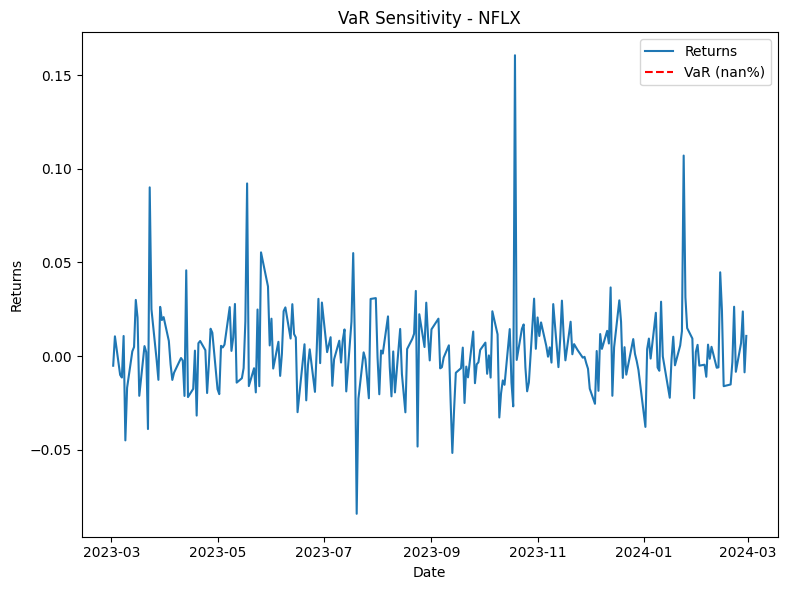

In [91]:
# Create VaR Sensitivity chart for NFLX stock
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(returns.index, returns, label='Returns')
ax.axhline(var_nflx, color='red', linestyle='--', label=f'VaR ({var_nflx:.2%})')
ax.set_title("VaR Sensitivity - NFLX")
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
ax.legend()
plt.tight_layout()
plt.show()



[*********************100%%**********************]  1 of 1 completed


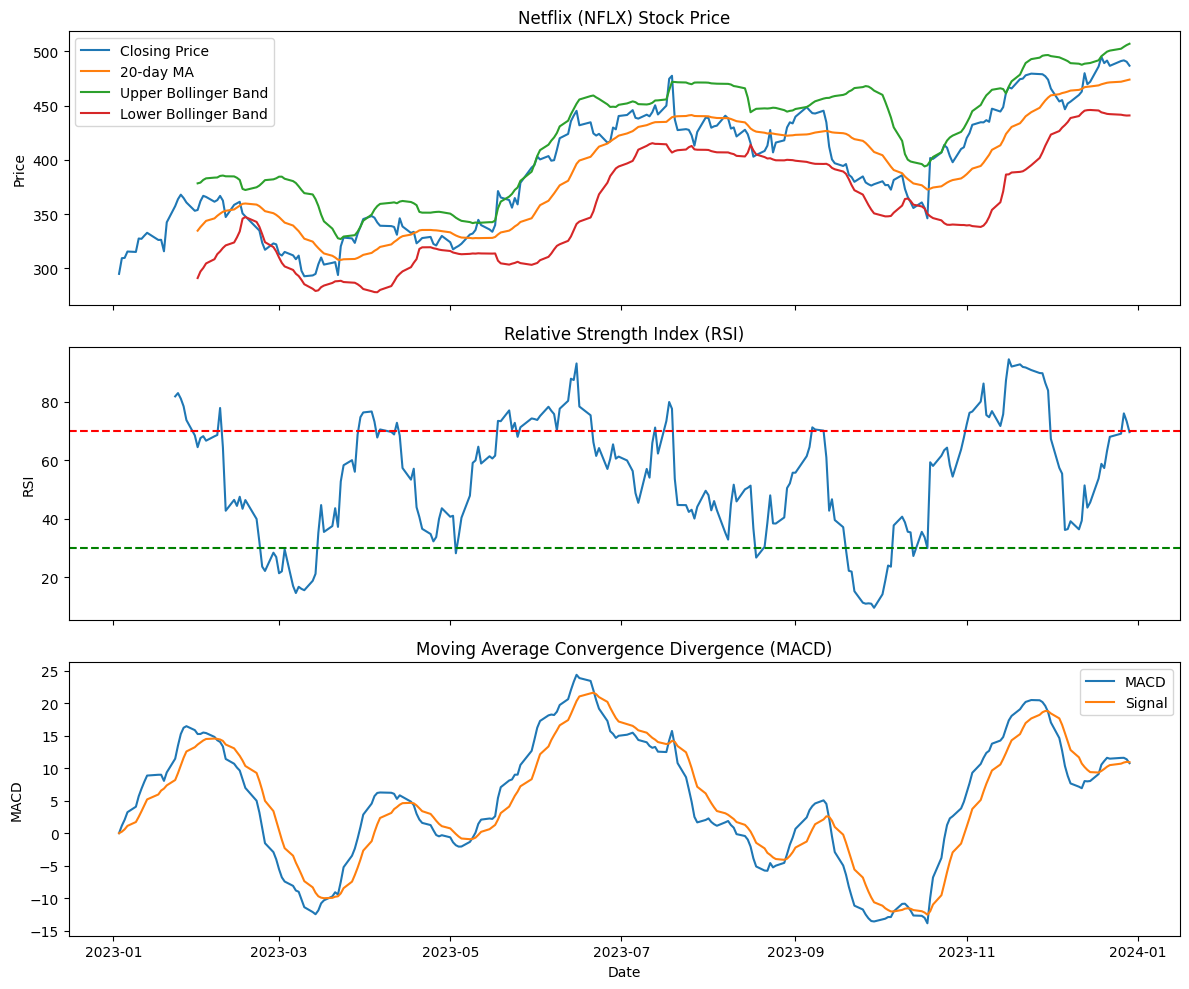

In [96]:
# Fetch historical stock data for NFLX
stock_symbol = "NFLX"
start_date = "2023-01-01"
end_date = "2024-01-01"
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate technical indicators
# Bollinger Bands
data['MA20'] = data['Close'].rolling(window=20).mean()
data['SD20'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['MA20'] + (2 * data['SD20'])
data['LowerBand'] = data['MA20'] - (2 * data['SD20'])

# RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot the stock price and technical indicators
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Price and Bollinger Bands
ax1.plot(data['Close'], label='Closing Price')
ax1.plot(data['MA20'], label='20-day MA')
ax1.plot(data['UpperBand'], label='Upper Bollinger Band')
ax1.plot(data['LowerBand'], label='Lower Bollinger Band')
ax1.set_title('Netflix (NFLX) Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# RSI
ax2.plot(data['RSI'])
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.axhline(y=70, color='red', linestyle='--')
ax2.axhline(y=30, color='green', linestyle='--')

# MACD
ax3.plot(data['MACD'], label='MACD')
ax3.plot(data['Signal'], label='Signal')
ax3.set_title('Moving Average Convergence Divergence (MACD)')
ax3.set_xlabel('Date')
ax3.set_ylabel('MACD')
ax3.legend()

plt.tight_layout()
plt.show()

In [97]:
# Moving Average (MA)
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Exponential Moving Average (EMA)
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Stochastic Oscillator
data['Low14'] = data['Low'].rolling(window=14).min()
data['High14'] = data['High'].rolling(window=14).max()
data['Stoch_K'] = 100 * (data['Close'] - data['Low14']) / (data['High14'] - data['Low14'])
data['Stoch_D'] = data['Stoch_K'].rolling(window=3).mean()

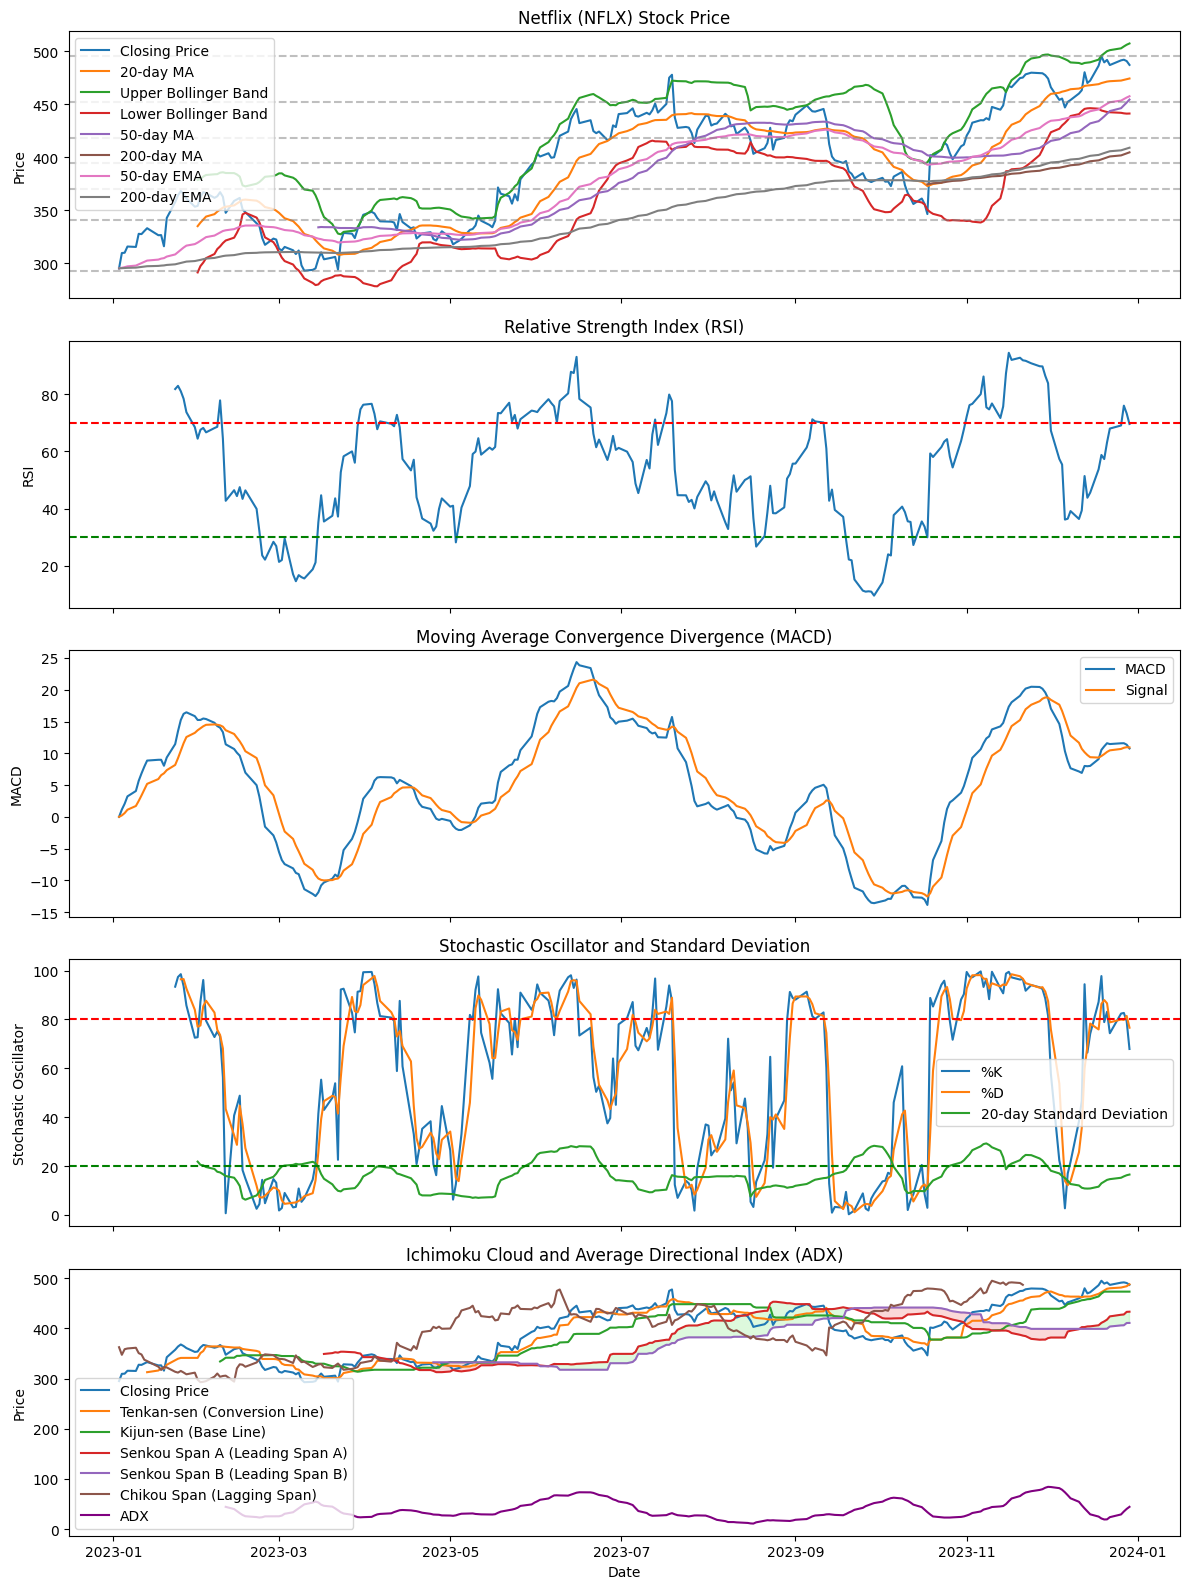

In [98]:


# Fibonacci Retracement
high = data['Close'].max()
low = data['Close'].min()
diff = high - low
levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
fibonacci_levels = [low + (diff * level) for level in levels]

# Ichimoku Cloud
data['Tenkan_sen'] = (data['High'].rolling(window=9).max() + data['Low'].rolling(window=9).min()) / 2
data['Kijun_sen'] = (data['High'].rolling(window=26).max() + data['Low'].rolling(window=26).min()) / 2
data['Senkou_span_A'] = ((data['Tenkan_sen'] + data['Kijun_sen']) / 2).shift(26)
data['Senkou_span_B'] = ((data['High'].rolling(window=52).max() + data['Low'].rolling(window=52).min()) / 2).shift(26)
data['Chikou_span'] = data['Close'].shift(-26)

# Standard Deviation
data['STD20'] = data['Close'].rolling(window=20).std()

# Average Directional Index (ADX)
def ADX(data, period=14):
    delta = data['High'] - data['Low']
    plus_dm = data['High'].diff()
    minus_dm = -data['Low'].diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm < 0] = 0
    tr = pd.concat([delta, plus_dm, minus_dm], axis=1).max(axis=1)
    plus_di = 100 * plus_dm.rolling(window=period).sum() / tr.rolling(window=period).sum()
    minus_di = 100 * minus_dm.rolling(window=period).sum() / tr.rolling(window=period).sum()
    dx = 100 * abs(plus_di - minus_di) / (plus_di + minus_di)
    adx = dx.rolling(window=period).mean()
    return plus_di, minus_di, adx

data['Plus_DI'], data['Minus_DI'], data['ADX'] = ADX(data)

# Plot the stock price and technical indicators
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 16), sharex=True)

# Price, Bollinger Bands, MA, EMA, and Fibonacci Retracement
ax1.plot(data['Close'], label='Closing Price')
ax1.plot(data['MA20'], label='20-day MA')
ax1.plot(data['UpperBand'], label='Upper Bollinger Band')
ax1.plot(data['LowerBand'], label='Lower Bollinger Band')
ax1.plot(data['MA50'], label='50-day MA')
ax1.plot(data['MA200'], label='200-day MA')
ax1.plot(data['EMA50'], label='50-day EMA')
ax1.plot(data['EMA200'], label='200-day EMA')
for level in fibonacci_levels:
    ax1.axhline(y=level, color='gray', linestyle='--', alpha=0.5)
ax1.set_title('Netflix (NFLX) Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# RSI
ax2.plot(data['RSI'])
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.axhline(y=70, color='red', linestyle='--')
ax2.axhline(y=30, color='green', linestyle='--')

# MACD
ax3.plot(data['MACD'], label='MACD')
ax3.plot(data['Signal'], label='Signal')
ax3.set_title('Moving Average Convergence Divergence (MACD)')
ax3.set_ylabel('MACD')
ax3.legend()

# Stochastic Oscillator and Standard Deviation
ax4.plot(data['Stoch_K'], label='%K')
ax4.plot(data['Stoch_D'], label='%D')
ax4.plot(data['STD20'], label='20-day Standard Deviation')
ax4.set_title('Stochastic Oscillator and Standard Deviation')
ax4.set_ylabel('Stochastic Oscillator')
ax4.axhline(y=80, color='red', linestyle='--')
ax4.axhline(y=20, color='green', linestyle='--')
ax4.legend()

# Ichimoku Cloud and ADX
ax5.plot(data['Close'], label='Closing Price')
ax5.plot(data['Tenkan_sen'], label='Tenkan-sen (Conversion Line)')
ax5.plot(data['Kijun_sen'], label='Kijun-sen (Base Line)')
ax5.plot(data['Senkou_span_A'], label='Senkou Span A (Leading Span A)')
ax5.plot(data['Senkou_span_B'], label='Senkou Span B (Leading Span B)')
ax5.plot(data['Chikou_span'], label='Chikou Span (Lagging Span)')
ax5.plot(data['ADX'], label='ADX', color='purple')
ax5.fill_between(data.index, data['Senkou_span_A'], data['Senkou_span_B'], where=data['Senkou_span_A'] >= data['Senkou_span_B'], color='lightgreen', alpha=0.3)
ax5.fill_between(data.index, data['Senkou_span_A'], data['Senkou_span_B'], where=data['Senkou_span_A'] < data['Senkou_span_B'], color='lightcoral', alpha=0.3)
ax5.set_title('Ichimoku Cloud and Average Directional Index (ADX)')
ax5.set_xlabel('Date')
ax5.set_ylabel('Price')
ax5.legend()

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


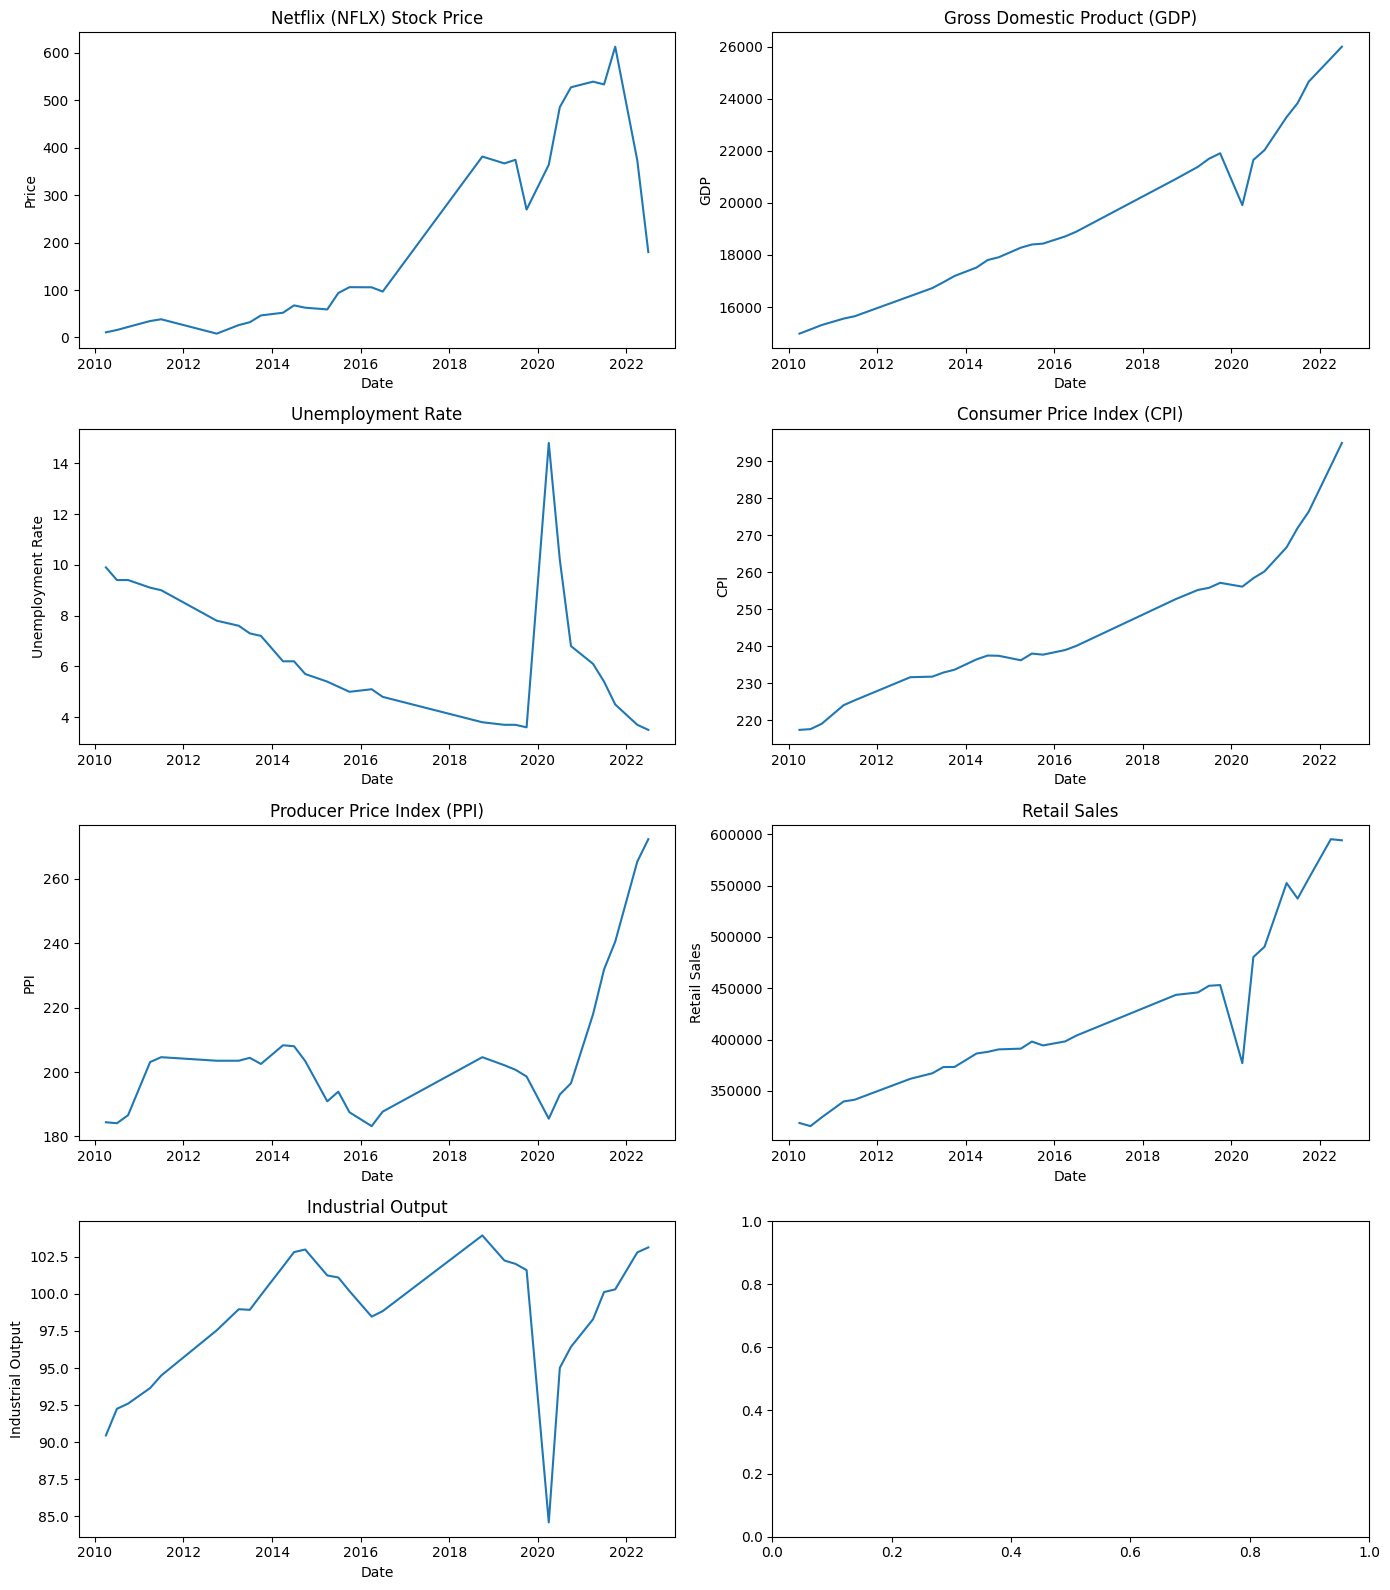

Correlation Matrix:
                   NFLX_Close       GDP  Unemployment_Rate       CPI  \
NFLX_Close           1.000000  0.831626          -0.214585  0.781796   
GDP                  0.831626  1.000000          -0.522977  0.986985   
Unemployment_Rate   -0.214585 -0.522977           1.000000 -0.460383   
CPI                  0.781796  0.986985          -0.460383  1.000000   
PPI                  0.373590  0.705851          -0.448457  0.771850   
Retail_Sales         0.788877  0.976043          -0.544716  0.968514   
Industrial_Output    0.110471  0.423688          -0.918492  0.388564   

                        PPI  Retail_Sales  Industrial_Output  
NFLX_Close         0.373590      0.788877           0.110471  
GDP                0.705851      0.976043           0.423688  
Unemployment_Rate -0.448457     -0.544716          -0.918492  
CPI                0.771850      0.968514           0.388564  
PPI                1.000000      0.785073           0.461410  
Retail_Sales       0.7850

In [100]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# Fetch historical stock data for NFLX
stock_symbol = "NFLX"
start_date = "2010-01-01"
end_date = "2023-06-07"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Fetch macroeconomic data
gdp_data = web.DataReader('GDP', 'fred', start=start_date, end=end_date)
unemployment_data = web.DataReader('UNRATE', 'fred', start=start_date, end=end_date)
cpi_data = web.DataReader('CPIAUCSL', 'fred', start=start_date, end=end_date)
ppi_data = web.DataReader('PPIACO', 'fred', start=start_date, end=end_date)
retail_sales_data = web.DataReader('RSXFS', 'fred', start=start_date, end=end_date)
industrial_output_data = web.DataReader('INDPRO', 'fred', start=start_date, end=end_date)

# Merge the stock and macroeconomic data
merged_data = pd.concat([stock_data['Close'], gdp_data, unemployment_data, cpi_data, ppi_data, retail_sales_data, industrial_output_data], axis=1)
merged_data.columns = ['NFLX_Close', 'GDP', 'Unemployment_Rate', 'CPI', 'PPI', 'Retail_Sales', 'Industrial_Output']
merged_data = merged_data.dropna()

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the stock price and macroeconomic indicators
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
axs = axs.flatten()

axs[0].plot(merged_data.index, merged_data['NFLX_Close'])
axs[0].set_title('Netflix (NFLX) Stock Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')

axs[1].plot(merged_data.index, merged_data['GDP'])
axs[1].set_title('Gross Domestic Product (GDP)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('GDP')

axs[2].plot(merged_data.index, merged_data['Unemployment_Rate'])
axs[2].set_title('Unemployment Rate')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Unemployment Rate')

axs[3].plot(merged_data.index, merged_data['CPI'])
axs[3].set_title('Consumer Price Index (CPI)')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('CPI')

axs[4].plot(merged_data.index, merged_data['PPI'])
axs[4].set_title('Producer Price Index (PPI)')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('PPI')

axs[5].plot(merged_data.index, merged_data['Retail_Sales'])
axs[5].set_title('Retail Sales')
axs[5].set_xlabel('Date')
axs[5].set_ylabel('Retail Sales')

axs[6].plot(merged_data.index, merged_data['Industrial_Output'])
axs[6].set_title('Industrial Output')
axs[6].set_xlabel('Date')
axs[6].set_ylabel('Industrial Output')

plt.tight_layout()
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

In [102]:
!pip install snscrape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.1 MB/s eta 0:00:00


In [105]:
!pip install requests

In [112]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Specify the URL of the Netflix reviews page
url = 'https://www.amazon.com/Netflix-Inc/product-reviews/B005ZXWMUS'

# Send a GET request to the URL and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the review elements on the page
review_elements = soup.find_all('div', class_='rvw js-rvw')

# Extract the review text from each review element
reviews = []
for review_element in review_elements:
    review_text = review_element.find('p', class_='rvw-bd').text.strip()
    reviews.append(review_text)

# Perform sentiment analysis on each review
sentiments = []
for review in reviews:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

# Classify sentiment based on the polarity score
sentiment_labels = ['Positive' if s > 0 else ('Negative' if s < 0 else 'Neutral') for s in sentiments]

# Calculate the percentage of positive, negative, and neutral reviews
sentiment_counts = pd.Series(sentiment_labels).value_counts()
sentiment_percentages = sentiment_counts / len(sentiments) * 100




In [116]:
!python -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [117]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [118]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Comments from https://www.amazon.com/gp/customer-reviews/)

comments = [
"What to watch I really don't know",
"I can't find a good enough show"
"Because my brain process is to slow"
"Netflix really does help it though"
"I know what to watch"
"Spending hours on a single show"
"My love for Netflix seems to grow"
"Millions of people connected"
"My change and warmth for Netflix was affected"
"Attention change focus directed"
"Oh how happy Am I that I'm connected!"
]

# Preprocess comments
def preprocess_text(text):
   # Convert to lowercase
   text = text.lower()

   # Remove URLs, mentions, and special characters
   text = re.sub(r'http\S+|@\S+|[^\w\s]', '', text)

   # Tokenize text
   tokens = word_tokenize(text)

   # Remove stopwords
   stop_words = set(stopwords.words('english'))
   filtered_tokens = [word for word in tokens if word not in stop_words]

   # Stem words
   stemmer = PorterStemmer()
   stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

   # Join stemmed tokens back into a string
   preprocessed_text = ' '.join(stemmed_tokens)

   return preprocessed_text

# Analyze sentiment
for comment in comments:
   preprocessed_comment = preprocess_text(comment)
   sentiment_scores = sentiment_analyzer.polarity_scores(preprocessed_comment)

   # Print sentiment scores
   print(f"Comment: {comment}")
   print(f"Sentiment Scores: {sentiment_scores}")
   print()

Comment: What to watch I really don't know
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: I can't find a good enough showBecause my brain process is to slowNetflix really does help it thoughI know what to watchSpending hours on a single showMy love for Netflix seems to growMillions of people connectedMy change and warmth for Netflix was affectedAttention change focus directedOh how happy Am I that I'm connected!
Sentiment Scores: {'neg': 0.06, 'neu': 0.695, 'pos': 0.246, 'compound': 0.8173}



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
!pip install textblob

In [120]:
from textblob import TextBlob

In [121]:
for comment in comments:
  preprocessed_comment = preprocess_text(comment)
  sentiment = TextBlob(preprocessed_comment).sentiment

  # Print sentiment scores (polarity and subjectivity)
  print(f"Comment: {comment}")
  print(f"Sentiment: {sentiment}")
  print()

Comment: What to watch I really don't know
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Comment: I can't find a good enough showBecause my brain process is to slowNetflix really does help it thoughI know what to watchSpending hours on a single showMy love for Netflix seems to growMillions of people connectedMy change and warmth for Netflix was affectedAttention change focus directedOh how happy Am I that I'm connected!
Sentiment: Sentiment(polarity=0.39999999999999997, subjectivity=0.5666666666666668)



In [126]:
import matplotlib.pyplot as plt

# Sentiment analysis results (replace with your actual data)
sentiment_scores = [(comment, sentiment.polarity, sentiment.subjectivity)
                    for comment, sentiment in zip(comments, [TextBlob(preprocess_text(c)).sentiment for c in comments])]

# Separate polarity and subjectivity scores
polarity_scores = [score[1] for score in sentiment_scores]
subjectivity_scores = [score[2] for score in sentiment_scores]


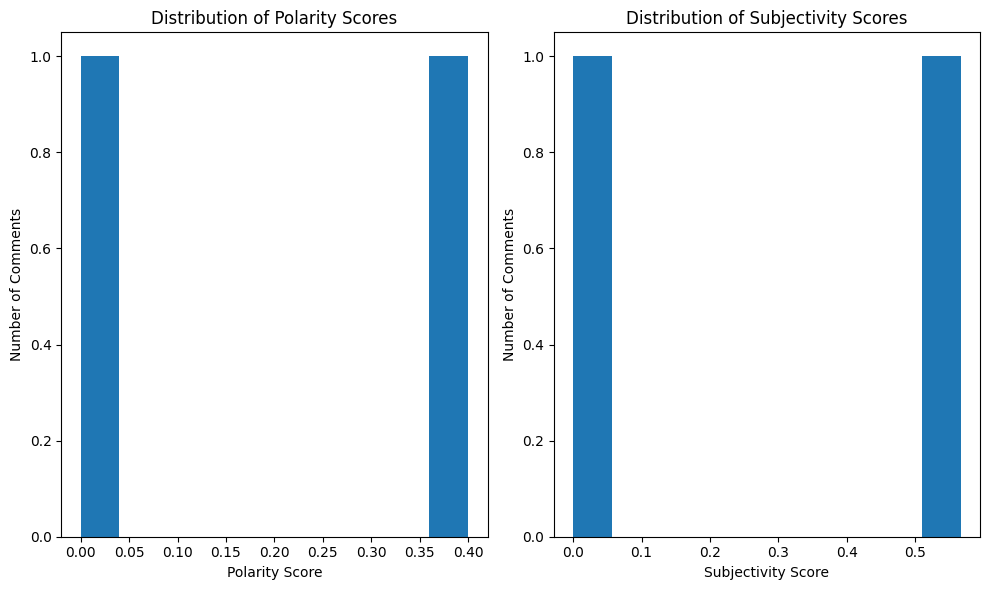

In [125]:
# Create separate bar charts
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)  # First subplot for polarity
plt.hist(polarity_scores)
plt.xlabel("Polarity Score")
plt.ylabel("Number of Comments")
plt.title("Distribution of Polarity Scores")

plt.subplot(1, 2, 2)  # Second subplot for subjectivity
plt.hist(subjectivity_scores)
plt.xlabel("Subjectivity Score")
plt.ylabel("Number of Comments")
plt.title("Distribution of Subjectivity Scores")

plt.tight_layout()
plt.show()